In [1]:
import matplotlib.pyplot as plt
import numpy as np
from myutils import *
from scipy.ndimage import zoom

/Users/ram/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Example list of images (replace this with your actual list of images)
# images = [np.random.rand(28, 28) for _ in range(16)]  # Example 16 random 28x28 images
folder_path = 'dataset'
images, eng_labels = images_to_numpy_array(folder_path)
images = np.array(images)
print(images.shape)

# Generate 100 random indices
random_indices = np.random.choice(images.shape[0], size=100, replace=False)

# Select the slices corresponding to the random indices
images = images[random_indices]

print(images.shape)

(10360, 32, 32)
(100, 32, 32)


In [3]:
zoom_factor = (2, 2)
# Zoom into each slice
images = np.array([zoom(slice_, zoom_factor, mode='nearest') for slice_ in images])
border_size = 2
images = np.pad(images, ((0, 0), (border_size, border_size), (border_size, border_size)), mode='constant')


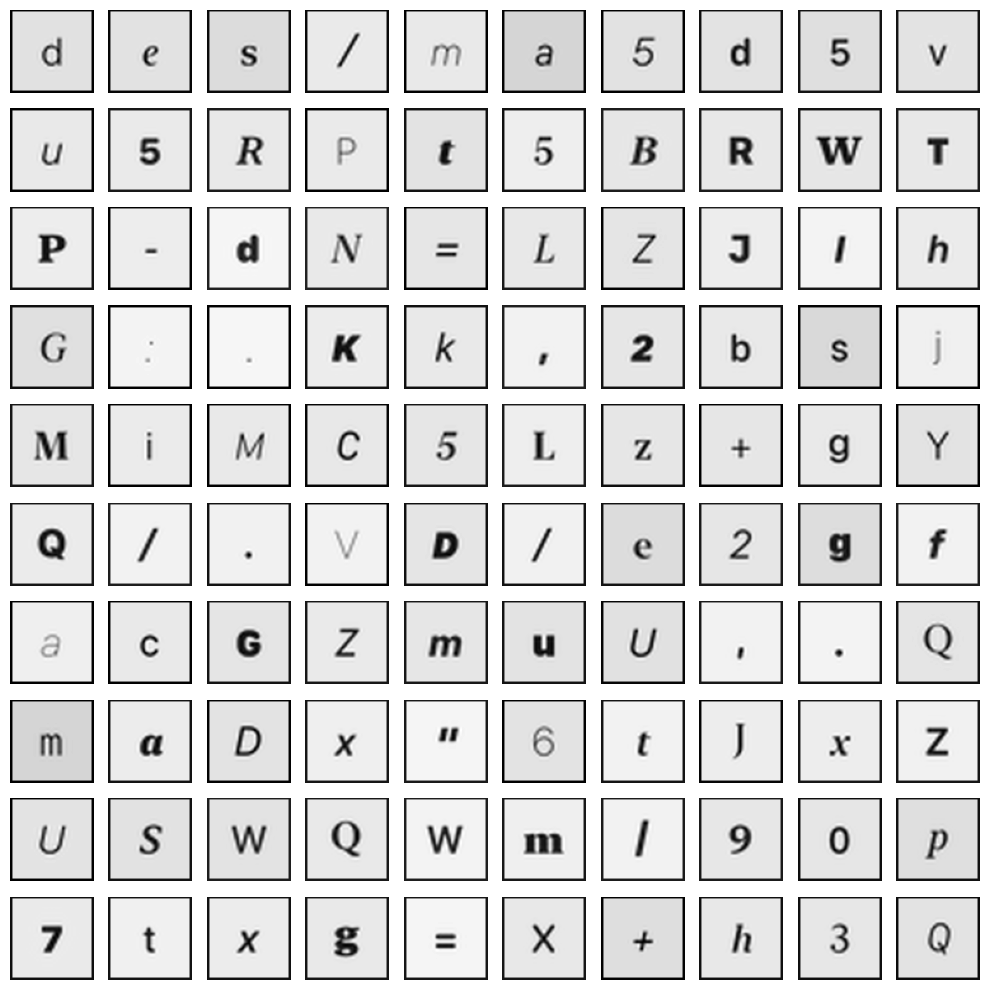

In [5]:
# Determine the grid layout based on the number of images
num_images = len(images)
num_rows = int(np.ceil(np.sqrt(num_images)))
num_cols = int(np.ceil(num_images / num_rows))

# Create the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

# Flatten the axes if necessary
if num_images == 1:
    axes = np.array([[axes]])

# Plot each image
for i, image in enumerate(images):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.imshow(image, cmap='gray')  # Change the colormap if necessary
    ax.axis('off')

# Hide any empty subplot
for i in range(num_images, num_rows*num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()